In [1]:
print ("Hello")

Hello


In [2]:
# Packages Needed
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
# Download the stopwords needed.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinkahler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#import the data csv file
ltb1 = pd.read_csv('/Users/justinkahler/Desktop/LTB_Wordcloud_Data.csv')
ltb1.head()

,Name,Type,Description,ABV,IBU,Average_Rating,Number_of_Ratings,Date_Added,general_type
0,Juice Cloud,IPA New England Hazy,"Brewed to minimize bitterness, and maximize de...",6.3,15,4.03,6050,7/27/17,IPA
1,Kula Wheat,Wheat American Pale Wheat,"Hawaiian for ""Golden"", Kula perfectly describe...",5.6,17,3.76,1855,11/20/15,Wheat Beer
2,Bomb Pop Slushee,Sour Fruited,"Inspired by America's summer treat, this Slus...",5.3,5,4.21,1612,6/13/19,Sour
3,Mo' Juice,IPA New England Hazy,"This cloudy, juicy, New-England style IPA was ...",6.7,10,4.07,1735,12/26/17,IPA
4,Mile of Munich,Lager Munich Dunkel,"""Mile of Munich"" is smooth and malty with toas...",5.4,19,3.73,1519,12/3/15,Lager


In [4]:
# How many rows are there in the original data?
ltb1.count()

Name                 306
Type                 306
Description          282
ABV                  302
IBU                  306
Average_Rating       290
Number_of_Ratings    306
Date_Added           306
general_type         306
dtype: int64

In [5]:
#filtering
# selecting rows based on Number_of_ratings >10
# rows with less than 10 reviews don't have an Average_Rating
ltb2 = ltb1[ltb1['Number_of_Ratings'] > 10] 
ltb2.head()

,Name,Type,Description,ABV,IBU,Average_Rating,Number_of_Ratings,Date_Added,general_type
0,Juice Cloud,IPA New England Hazy,"Brewed to minimize bitterness, and maximize de...",6.3,15,4.03,6050,7/27/17,IPA
1,Kula Wheat,Wheat American Pale Wheat,"Hawaiian for ""Golden"", Kula perfectly describe...",5.6,17,3.76,1855,11/20/15,Wheat Beer
2,Bomb Pop Slushee,Sour Fruited,"Inspired by America's summer treat, this Slus...",5.3,5,4.21,1612,6/13/19,Sour
3,Mo' Juice,IPA New England Hazy,"This cloudy, juicy, New-England style IPA was ...",6.7,10,4.07,1735,12/26/17,IPA
4,Mile of Munich,Lager Munich Dunkel,"""Mile of Munich"" is smooth and malty with toas...",5.4,19,3.73,1519,12/3/15,Lager


In [6]:
# How many rows are left after filtering?
ltb2.count()

Name                 284
Type                 284
Description          272
ABV                  284
IBU                  284
Average_Rating       284
Number_of_Ratings    284
Date_Added           284
general_type         284
dtype: int64

In [7]:
# checking data types
ltb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 284
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               284 non-null    object 
 1   Type               284 non-null    object 
 2   Description        272 non-null    object 
 3   ABV                284 non-null    float64
 4   IBU                284 non-null    object 
 5   Average_Rating     284 non-null    object 
 6   Number_of_Ratings  284 non-null    int64  
 7   Date_Added         284 non-null    object 
 8   general_type       284 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 22.2+ KB


In [8]:
# convert just columns ABV, IBU, Average_Rating, Number_of_ratings

# using dictionary to convert specific columns
convert_dict = {'ABV': float,
                'IBU': float,
                'Average_Rating': float,
                'Number_of_Ratings': float,
                'Description': str
                }
 
ltb3 = ltb2.astype(convert_dict)
print(ltb3.dtypes)

# Had to convert Description to strbefore joining, there were numbers in it




Name                  object
Type                  object
Description           object
ABV                  float64
IBU                  float64
Average_Rating       float64
Number_of_Ratings    float64
Date_Added            object
general_type          object
dtype: object


In [ ]:
#Name Word Clouds

In [9]:
#Make a wordcloud of beer names
#separate out the name column
names = ltb3["Name"]
names.head()

0         Juice Cloud
1          Kula Wheat
2    Bomb Pop Slushee
3           Mo' Juice
4      Mile of Munich
Name: Name, dtype: object

In [10]:
#join all rows into 1 text object
nametext = pd.Series(' '.join(ltb3['Name'].to_list()), name='Name')
nametext.head()

0    Juice Cloud Kula Wheat Bomb Pop Slushee Mo' Ju...
Name: Name, dtype: object

In [11]:
#This code is optional if all lowercase text is necessary
#change to lowercase
#nametext = nametext.str.lower()
#nametext.head()

In [12]:
#remove punctuation
nametext = nametext.str.replace(r'[^\w\s]+', '')
nametext.head()

/var/folders/c7/w8g6vqsj69n7m_qskywrqxf80000gn/T/ipykernel_2263/3942502309.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  nametext = nametext.str.replace(r'[^\w\s]+', '')


0    Juice Cloud Kula Wheat Bomb Pop Slushee Mo Jui...
Name: Name, dtype: object

In [13]:
#import nltk
name_STOP_WORDS = nltk.corpus.stopwords.words('english')

# add my custom words to stopwords in the nameStopWords list
nameStopWords = ["dtype","object","Type"]
name_STOP_WORDS.extend(nameStopWords)

print(len(name_STOP_WORDS))
print(name_STOP_WORDS)

182
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [14]:
#new variable with stop words removed
filtered_names = [word for word in nametext if word not in name_STOP_WORDS]
#print (filtered_names)

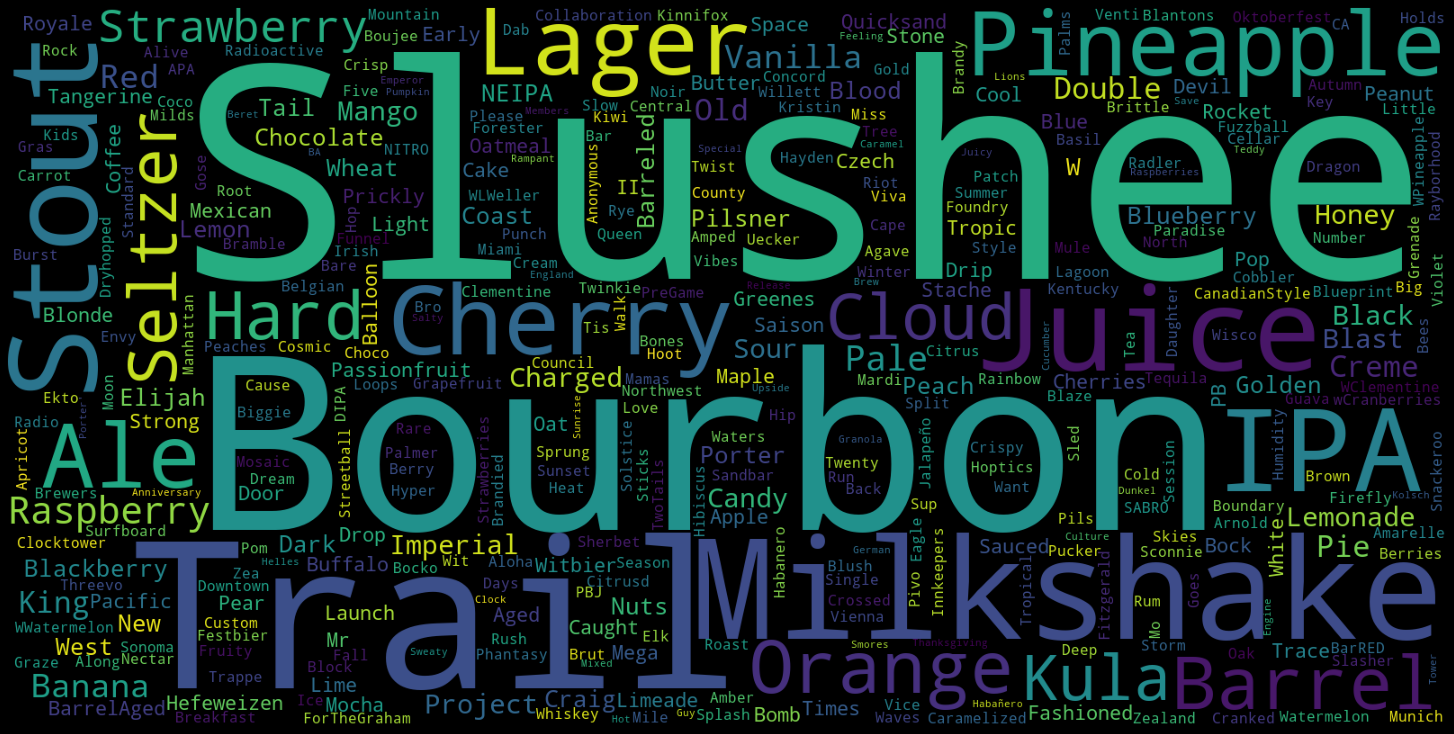

In [15]:
# Read the whole text.
#collocations=False keeps python from forming multigrams like New England is split to New and England

wordcloud = WordCloud(width=1600, height=800,collocations=False, max_words=1000).generate(str(filtered_names))

# Open a plot of the generated image.

#plt.figure( figsize=(20,10), facecolor='blue')
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Beer Type Word Clouds

In [16]:
#Make a wordcloud of beer types
# Separate out the Type column
types = ltb3["Type"]
types.head()

0         IPA  New England  Hazy
1    Wheat   American Pale Wheat
2                  Sour  Fruited
3         IPA  New England  Hazy
4           Lager  Munich Dunkel
Name: Type, dtype: object

In [17]:
#Join all rows into 1 text object
typetext = pd.Series('  '.join(ltb3['Type'].to_list()), name='Type')
typetext.head()

0    IPA  New England  Hazy  Wheat   American Pale ...
Name: Type, dtype: object

In [18]:
#This is optional if lower case is needed
#change to lowercase
#typetext = typetext.str.lower()
#typetext.head()

In [19]:
#remove punctuation
typetext = typetext.str.replace(r'[^\w\s\/]+', '')
#typetext = typetext.str.split()

typetext.head()

/var/folders/c7/w8g6vqsj69n7m_qskywrqxf80000gn/T/ipykernel_2263/3024280874.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  typetext = typetext.str.replace(r'[^\w\s\/]+', '')


0    IPA  New England  Hazy  Wheat   American Pale ...
Name: Type, dtype: object

In [20]:
print (typetext)

0    IPA  New England  Hazy  Wheat   American Pale ...
Name: Type, dtype: object


In [21]:
#Need to remove dtype, object, and Type

#wordcloud = WordCloud().generate(str(typetext))

#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

In [22]:
# add my words to stopwords
import nltk
Type_STOP_WORDS = nltk.corpus.stopwords.words('english')

TypeStopWords = ["dtype","object","Type","single","Other","Other'","Other '","de","England","New","Single"]
Type_STOP_WORDS.extend(TypeStopWords)

print(len(Type_STOP_WORDS))
print(Type_STOP_WORDS)

190
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [23]:
filtered_types = [word for word in typetext if word not in Type_STOP_WORDS]
print (filtered_types)

['IPA  New England  Hazy  Wheat   American Pale Wheat  Sour  Fruited  IPA  New England  Hazy  Lager  Munich Dunkel  Lager  Vienna  Pale Ale  Milkshake  IPA  Imperial  Double New England  Hazy  IPA  New England  Hazy  IPA  Imperial  Double  Sour  Fruited  Sour  Smoothie  Pastry  IPA  Imperial  Double New England  Hazy  Stout  Oatmeal  Pale Ale  Milkshake  Pale Ale  Milkshake  IPA  New England  Hazy  Lager  American Light  Sour  Fruited  IPA  American  Stout  American  IPA  New England  Hazy  Porter  Imperial  Double  IPA  American  Porter    Sour  Fruited  IPA  Triple  Bock    Traditional  Sour  Fruited  Wheat   Witbier  Blanche  Stout    Sour  Fruited  Farmhouse Ale  Saison  Sour  Fruited  Stout  Imperial  Double  Shandy  Radler  Pale Ale  Milkshake  Sour  Fruited  Stout  Imperial  Double  Cream Ale  IPA  New England  Hazy  Stout  Pastry  Sour  Fruited  Cream Ale  Sour  Fruited  Sour  Fruited Gose  Sour  Fruited  IPA  Imperial  Double  IPA  American  Sour  Fruited  Stout    Sour  Fruit

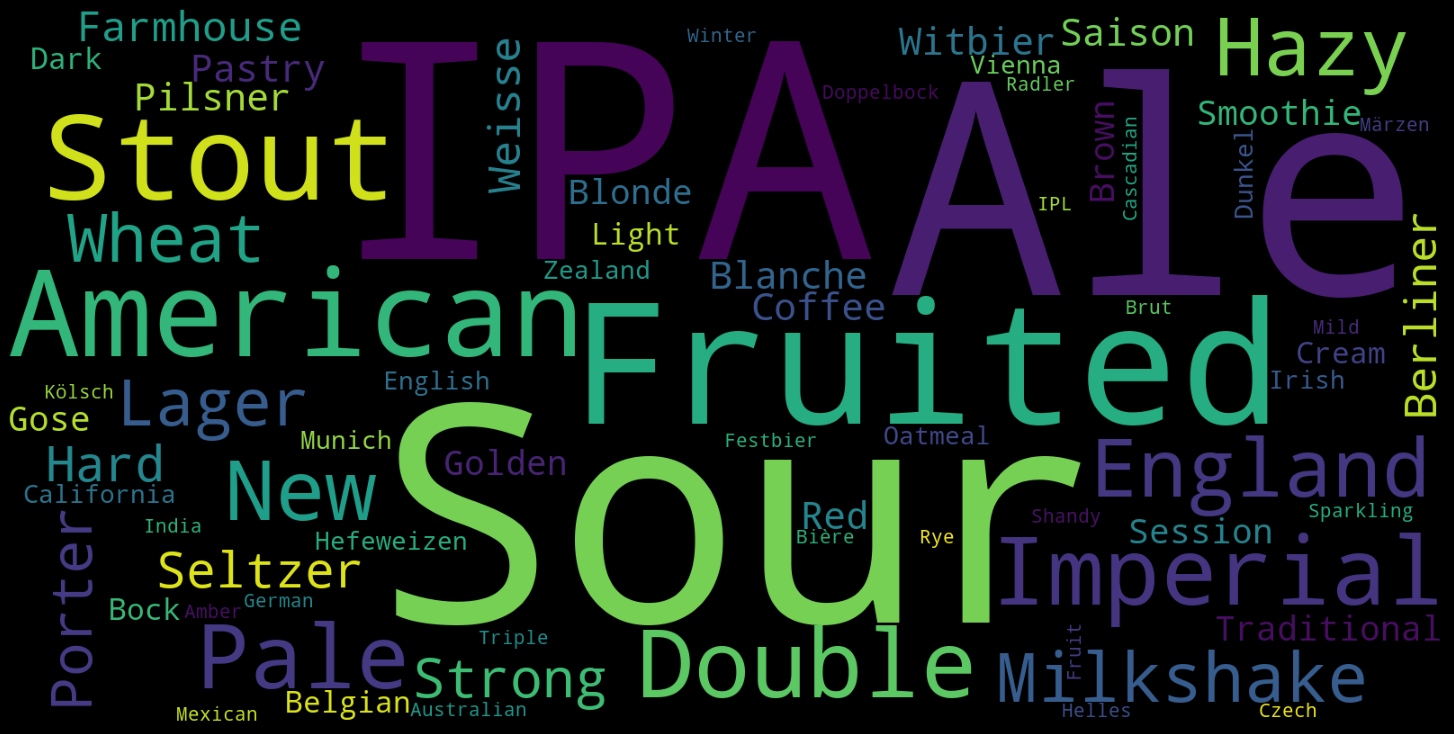

In [25]:
# Read the whole text.
#collocations=False keeps python from forming multigrams like NEW ENGLAND is split to NEW and England
#text = open(path.join(d, 'constitution.txt')).read()
wordcloud = WordCloud(width=1600, height=800,collocations=False).generate(str(filtered_types))
#wordcloud = WordCloud(width=1600, height=800).generate(str(typetext))


# Open a plot of the generated image.

#plt.figure( figsize=(20,10), facecolor='blue')
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [31]:
#Make a wordcloud from the beer descriptions

In [32]:
#separate out the description column
description = ltb3["Description"]
description.head()

0    Brewed to minimize bitterness, and maximize de...
1    Hawaiian for "Golden", Kula perfectly describe...
2    Inspired by America's  summer treat, this Slus...
3    This cloudy, juicy, New-England style IPA was ...
4    "Mile of Munich" is smooth and malty with toas...
Name: Description, dtype: object

In [33]:
# Join all rows into 1 text object
# Had to convert Description to strbefore joining, there were numbers in it
descriptiontext = pd.Series(''.join(ltb3['Description'].to_list()), name='Description')
descriptiontext.head()

0    Brewed to minimize bitterness, and maximize de...
Name: Description, dtype: object

In [34]:
#remove punctuation
descriptiontext = descriptiontext.str.replace(r'[^\w\s]+', '')
descriptiontext.head()

/var/folders/c7/w8g6vqsj69n7m_qskywrqxf80000gn/T/ipykernel_2263/1870700215.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  descriptiontext = descriptiontext.str.replace(r'[^\w\s]+', '')


0    Brewed to minimize bitterness and maximize del...
Name: Description, dtype: object

In [35]:
#change to lowercase
descriptiontext = descriptiontext.str.lower()
descriptiontext.head()

0    brewed to minimize bitterness and maximize del...
Name: Description, dtype: object

In [36]:
# add my words to stopwords
import nltk
description_STOP_WORDS = nltk.corpus.stopwords.words('english')

descriptionStopWords = ["dtype","object","Type","Contains", "touch", 
                        "one", "two", "bring", "Release",
                        "features", "base", "yet", "key", 
                        "favorite", "dose", "will", "give", 
                        "made", "year", "conditid"]
description_STOP_WORDS.extend(descriptionStopWords)

print(len(description_STOP_WORDS))
print(description_STOP_WORDS)

199
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [37]:
filtered_descriptions = [word for word in descriptiontext if word not in description_STOP_WORDS]
print (filtered_descriptions)

['brewed to minimize bitterness and maximize delicious juicy citra hop flavors big s of oats and wheat deliver nice mouthfeel and leave a lovely cloud of haze double dryhopped with citra hops leaving a clean tropical fruit juicy finish hawaiian for golden kula perfectly describes our american wheat ale crisp and refreshing kula wheat is brewed with golden barley and white wheat malt then fermented with 125 fresh ripe pineapples inspired by americas  summer treat this slusheestyle kettle sour  an enormous amount of real fruit including raspberry sweet cherry and  lime thick tart and fruity  lactose this cloudy juicy newengland style ipa was bursted with citra hops and then double dryhopped with mosaic hops to showcase the aromatic medley of mosaic hops such as tangerine papaya grapefruit and orange citrus mile of munich is smooth and malty with toasted bread notes and a hint of dark chocolate this germanstyle dunkel dark lager is loaded with german dark munich malt and balanced gently w

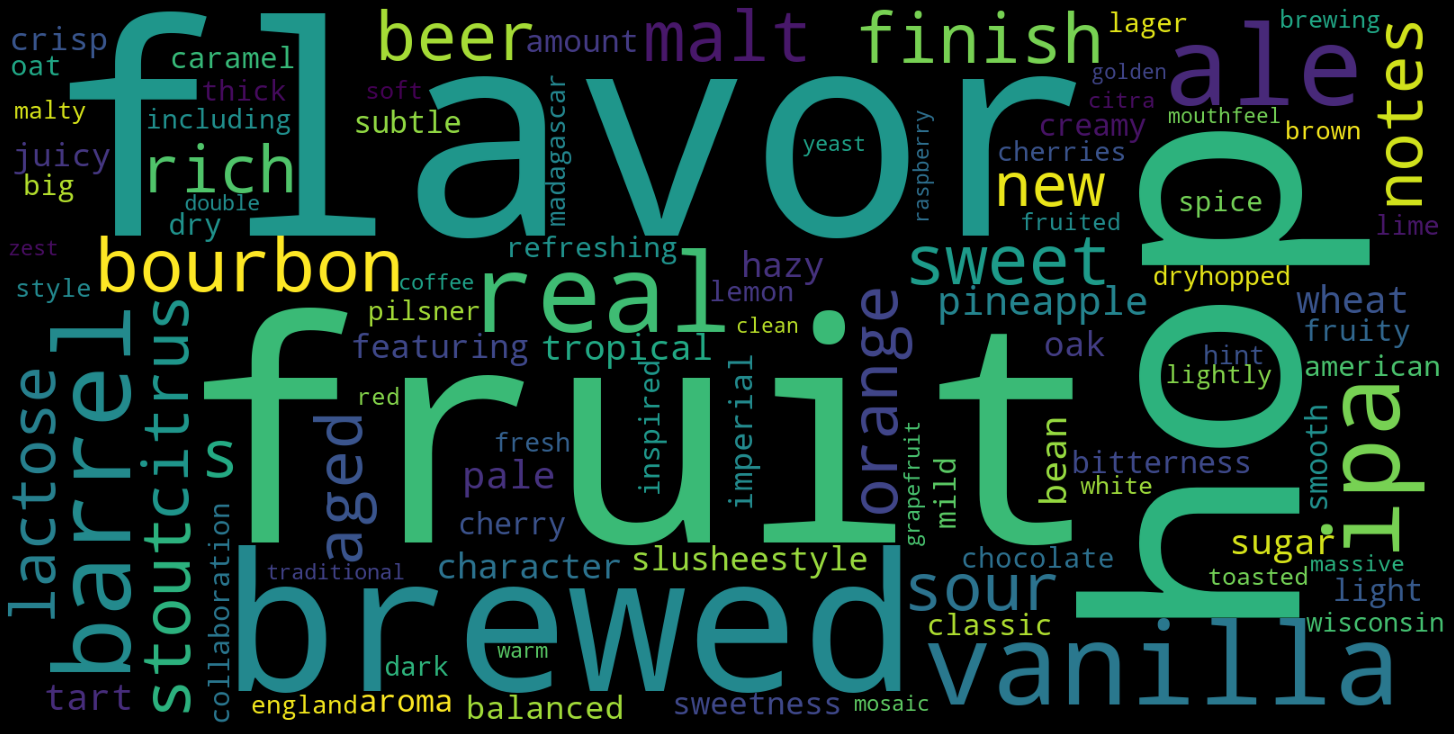

In [38]:
# Read the whole text.
#collocations=False keeps python from forming multigrams like NEW ENGLAND is split to NEW and England
#text = open(path.join(d, 'constitution.txt')).read()
wordcloud = WordCloud(width=1600, height=800,collocations=False, max_words=100).generate(str(filtered_descriptions))
#wordcloud = WordCloud(width=1600, height=800,collocations=False).generate(str(filtered_descriptions))

# Open a plot of the generated image.

#plt.figure( figsize=(20,10), facecolor='blue')
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()